__Part 1 ‑ Exploratory data analysis__

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [6]:
import pandas as pd
from datetime import datetime, timedelta
import json
import calendar
import matplotlib.pyplot as plt


# converting JSON file into dataframe
df = pd.read_json('logins.json', lines=False)
df.head(5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [2]:
print(df.describe(), '\n')
print(df.info(), '\n')
print('Are there any null values in the data?', df.isnull().values.any())

                 login_time
count                 93142
unique                92265
top     1970-02-12 11:16:53
freq                      3
first   1970-01-01 20:12:16
last    1970-04-13 18:57:38 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
None 

Are there any null values in the data? False


In [9]:
# creating new 'interval' column that indicates which 15 minute interval login time belongs to
def time_interval(time):
    if time.minute < 15:
        return time.strftime('%Y-%m-%d %H:00')
    elif time.minute < 30:
        return time.strftime('%Y-%m-%d %H:15')
    elif time.minute < 45:
        return time.strftime('%Y-%m-%d %H:30')
    else:
        return time.strftime('%Y-%m-%d %H:45')
    
df['interval'] = df['login_time'].apply(lambda x: time_interval(x))
df['day_of_week'] = df['login_time'].apply(lambda x: calendar.day_name[x.weekday()])
df['hour_of_day'] = df['login_time'].apply(lambda x: x.strftime('%H'))
df.head(5)

,login_time,interval,day_of_week,hour_of_day
0,1970-01-01 20:13:18,1970-01-01 20:00,Thursday,20
1,1970-01-01 20:16:10,1970-01-01 20:15,Thursday,20
2,1970-01-01 20:16:37,1970-01-01 20:15,Thursday,20
3,1970-01-01 20:16:36,1970-01-01 20:15,Thursday,20
4,1970-01-01 20:26:21,1970-01-01 20:15,Thursday,20


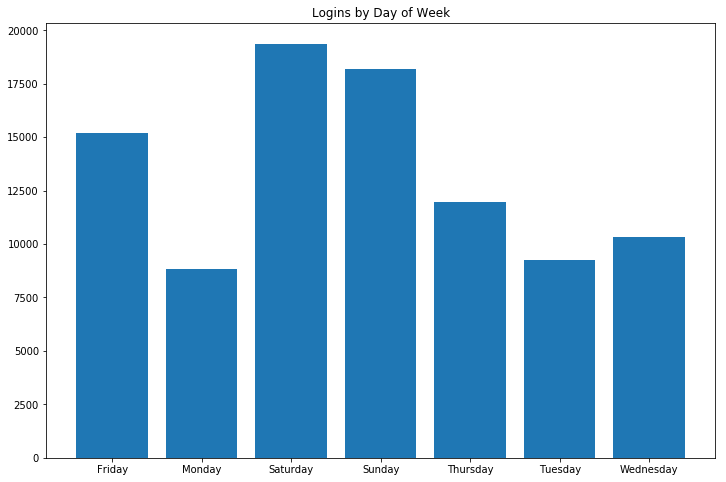

In [14]:
grouped_dow = df.groupby(['day_of_week']).count()

plt.figure(figsize=(12,8))
plt.bar(grouped_dow.index, grouped_dow.login_time)
plt.title('Logins by Day of Week')
plt.show()

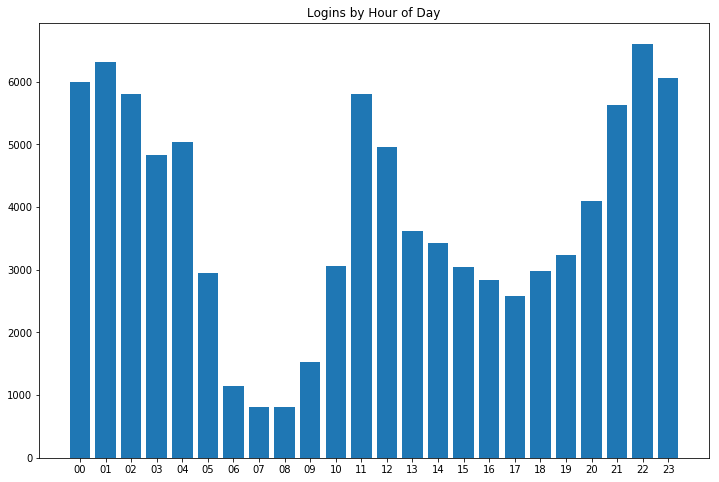

In [16]:
grouped_dow = df.groupby(['hour_of_day']).count()

plt.figure(figsize=(12,8))
plt.bar(grouped_dow.index, grouped_dow.login_time)
plt.title('Logins by Hour of Day')
plt.show()

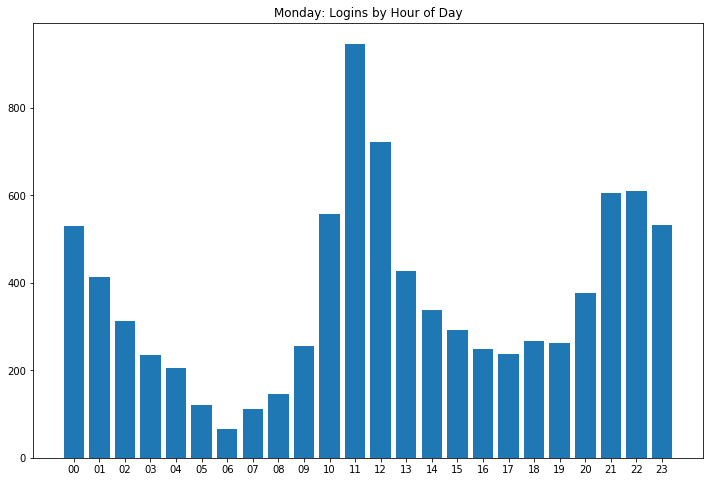

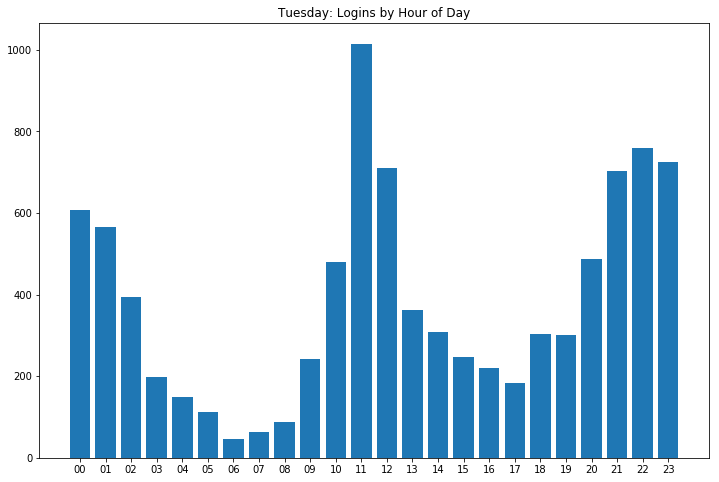

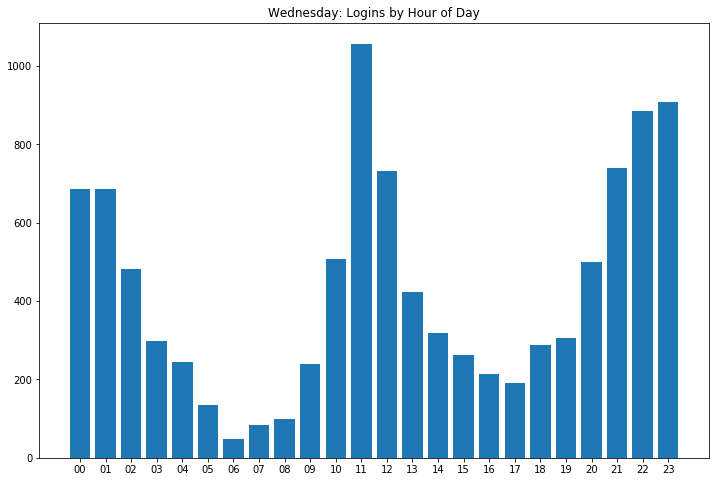

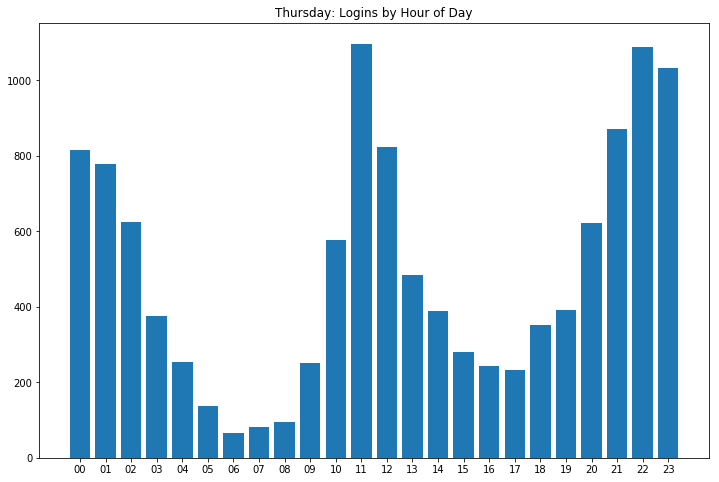

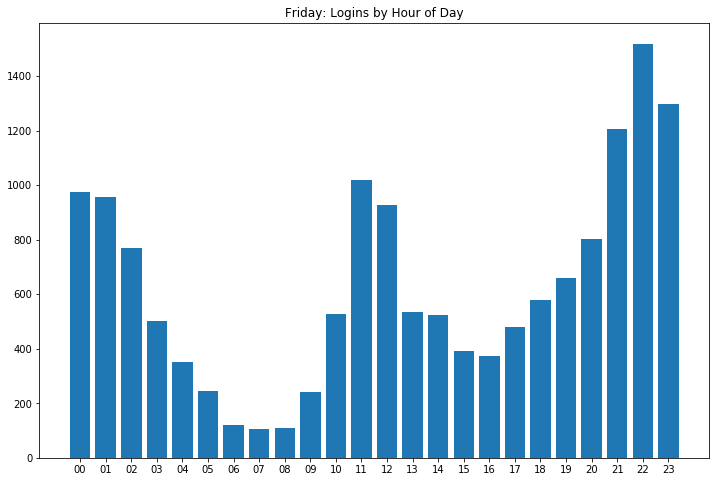

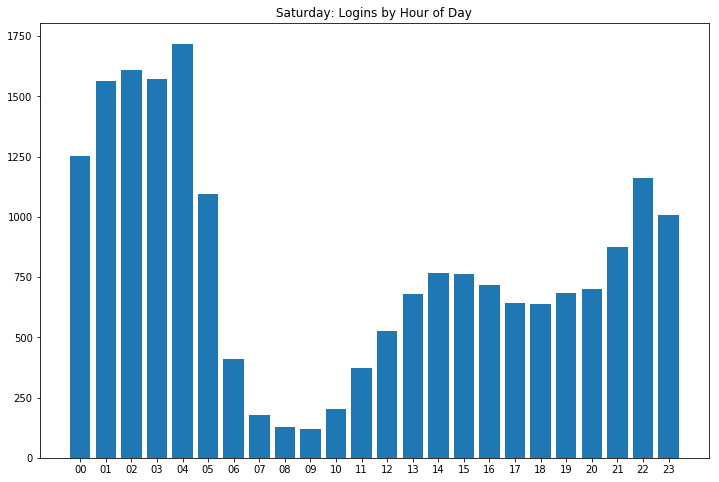

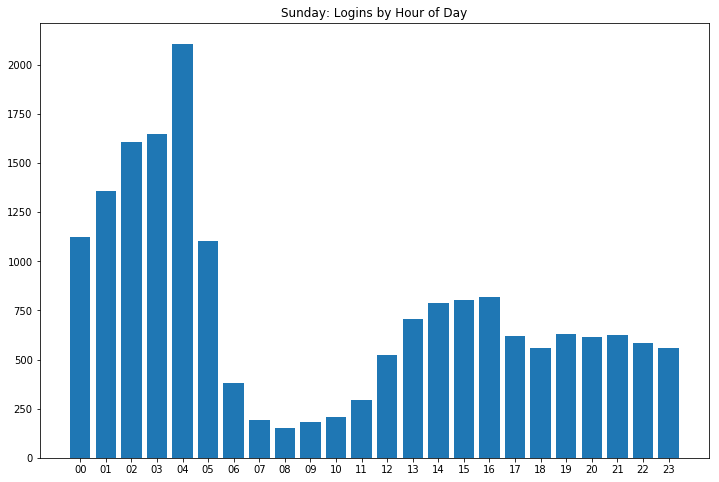

In [22]:
# plotting hourly logins by day of week

day_of_week_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in day_of_week_list:
    dow_df = (df[df['day_of_week']==day]).groupby(['hour_of_day']).count()
    plt.figure(figsize=(12,8))
    plt.bar(dow_df.index, dow_df.login_time)
    plt.title('{}: Logins by Hour of Day'.format(day))
    plt.show()

__Summary__

From the EDA of this file, it appears that we observe that the greatest demand is seen on Saturdays, Sundays and Mondays.  

When we graph the hourly demand by day of week, we can see that there are different trends for weekdays vs. weekends.  For weekdays, we see a sharp peaking of demand once around noon and once around midnight.  However, for weekends, we observe a peaking of demand after midnight, a dropping off in the early morning and then a moderate increase again around noon.